<a href="https://colab.research.google.com/github/farinaz-hatami/Module-3-Assignments/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

* My Chosen dataset:
Maternal, Child, and Adolescent Health Needs Assessment (2023–2024)
City and County of San Francisco, Department of Public Health
https://catalog.data.gov/dataset/maternal-child-and-adolescent-health-needs-assessment-2023-2024

Who: (Audience and Analyst)

The audience is considered as Public health officials, community health planners, nonprofit organizations, and policymakers are working to improve health outcomes for women, pregnant people, infants, children, and adolescents in San Francisco. These stakeholders need insights into health trends, disparities, and priority conditions across demographic groups to guide decision‑making and allocation of resources. I, as the data analyst, examine the dataset to uncover trends, identify disparities, and translate the numbers into actionable insights that the audience can use.

What: (key insight and primary message)

This dataset demonestrate the counts and prevalence rates for a wide range of health conditions like infant mortality, childhood obesity, adolescent mental health issues, chronic disease risks across different demographics such as age, race/ethnicity, insurance status, and zip code. By exploring these data, we can highlight the most health needs and track different trends over time. In addition, can identify health disparities that require targeted interventions.

for example:
Rates of adverse birth outcomes (like low birth weight or preterm birth) by ZIP code or racial/ethnic group, teen pregnancy rates by age group and access to prenatal care (timeliness or adequacy). According to this dataset, Teen pregnancy rates are highest among adolescents aged 15–19 and are concentrated in the southeastern neighborhoods of San Francisco. And infants in ZIP codes 94124 and 94110 have significantly higher low birth weight rates compared to the city average.

How:
Create clear, focused visualizations that make comparisons and patterns easy to see:
Bar charts to compare rates of key health indicators (like prenatal care access or birth outcomes) across neighborhoods, age groups, or racial/ethnic groups.
Line charts to show trends over time, especially if the dataset includes weekly or periodic measures.
Color and labeling to emphasize important differences , for example, highlight ZIP codes with above-average unmet needs or age groups with rising risk behaviors.
Annotations and descriptive titles that call out the key insight (ex: Highest adolescent behavioral health needs in ZIP 94124).
Every chart should answer a clear question and support a decision , for example, Which neighborhoods should receive more prenatal support services? or Which adolescent health risks are increasing and need program attention?

# 3. Homework - work with your own data

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [9]:
# load the dataset

url = "https://data.sfgov.org/api/views/iqtk-etij/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)


print(df.head(10))
print(df.columns)

     Age_group  Sex             Topic         Data_source  \
0  0to12months  ALL  HEALTH CONDITION  CDPH BIRTH RECORDS   
1  0to12months  ALL  HEALTH CONDITION  CDPH BIRTH RECORDS   
2  0to12months  ALL  HEALTH CONDITION  CDPH BIRTH RECORDS   
3  0to12months  ALL  HEALTH CONDITION  CDPH BIRTH RECORDS   
4  0to12months  ALL  HEALTH CONDITION  CDPH BIRTH RECORDS   
5  0to12months  ALL  HEALTH CONDITION  CDPH BIRTH RECORDS   
6  0to12months  ALL  HEALTH CONDITION  CDPH BIRTH RECORDS   
7  0to12months  ALL  HEALTH CONDITION  CDPH BIRTH RECORDS   
8  0to12months  ALL  HEALTH CONDITION  CDPH BIRTH RECORDS   
9  0to12months  ALL  HEALTH CONDITION  CDPH BIRTH RECORDS   

                        Health_condition-Data_source     Period    Year  \
0  ASSISTED VENTILATION FOR >6 HOURS - CDPH BIRTH...       2019  2019.0   
1  ASSISTED VENTILATION FOR >6 HOURS - CDPH BIRTH...       2020  2020.0   
2  ASSISTED VENTILATION FOR >6 HOURS - CDPH BIRTH...       2021  2021.0   
3  ASSISTED VENTILATION FOR 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62714 entries, 0 to 62713
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age_group                     62713 non-null  object 
 1   Sex                           62714 non-null  object 
 2   Topic                         62713 non-null  object 
 3   Data_source                   62714 non-null  object 
 4   Health_condition-Data_source  62713 non-null  object 
 5   Period                        62713 non-null  object 
 6   Year                          32079 non-null  float64
 7   Denominator                   62526 non-null  float64
 8   Denominator_is                62594 non-null  object 
 9   Number_with_outcome           62595 non-null  float64
 10  Numerator_is                  62699 non-null  object 
 11  Rate_95CI                     62566 non-null  object 
 12  Rate_SF_pop                   62566 non-null  float64
 13  C

In [11]:
df.describe(include="all")


,Age_group,Sex,Topic,Data_source,Health_condition-Data_source,Period,Year,Denominator,Denominator_is,Number_with_outcome,...,Race_ethnicity,Rate_title,Trend_title,Filter_1000_or_more,Sort_1000_or_more,Primary_Neighborhood,Cause of death rank,Death_tooltip,Latest_data,Unique_row_id
count,62713,62714,62713,62714,62713,62713,32079.000000,6.252600e+04,62594,62595.000000,...,62713,62713,62690,62714,62714.000000,62704,38.00000,44,34.0,62714.000000
unique,46,5,11,17,442,57,NaN,NaN,25,NaN,...,12,9021,1514,7,NaN,27,NaN,38,NaN,NaN
top,PREGNANT,ALL,HEALTH CONDITION,ER VISITS,ALL ER VISITS - ER VISITS,2017-2021,NaN,NaN,CENSUS ESTIMATE,NaN,...,ALL,Rate of ALL HOSPITAL ADMISSIONS - HOSPITAL ADM...,Rate of ALL ER VISITS - ER VISITS - per 1000 S...,20-50,NaN,All,NaN,All cause death rate,NaN,NaN
freq,8683,29576,25788,27028,3991,10172,NaN,NaN,41722,NaN,...,42886,70,513,23454,NaN,33890,NaN,4,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2017.864740,4.273821e+04,NaN,461.820491,...,NaN,NaN,NaN,NaN,5.248047,NaN,3.00000,NaN,1.0,31357.500000
std,NaN,NaN,NaN,NaN,NaN,NaN,3.447658,1.308972e+05,NaN,2624.301571,...,NaN,NaN,NaN,NaN,1.241516,NaN,1.57686,NaN,0.0,18104.116728
min,NaN,NaN,NaN,NaN,NaN,NaN,1997.000000,2.300000e+01,NaN,14.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,1.00000,NaN,1.0,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,1.116000e+03,NaN,36.000000,...,NaN,NaN,NaN,NaN,4.000000,NaN,2.00000,NaN,1.0,15679.250000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,7.184000e+03,NaN,74.000000,...,NaN,NaN,NaN,NaN,5.000000,NaN,3.00000,NaN,1.0,31357.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,2.636700e+04,NaN,221.000000,...,NaN,NaN,NaN,NaN,6.000000,NaN,4.00000,NaN,1.0,47035.750000


In [12]:
# Question 2: Are there any dublicates:

# Check for duplicate rows
duplicates = df.duplicated()

# Print number of duplicate rows
num_duplicates = duplicates.sum()
print("Number of duplicate rows:", num_duplicates)

# Display the duplicate rows if any
if num_duplicates > 0:
    print("Duplicate rows:")
    display(df[duplicates])
else:
    print("No duplicate rows found.")


Number of duplicate rows: 0
No duplicate rows found.


* I checked for duplicate rows in the dataset using df.duplicated(). The result shows that there are 0 duplicate rows, meaning each row in the dataset is unique.

In [13]:
# Question 3 : Are there any duplicate values in a given column (when this would be inappropriate?)


# Columns where all values are unique
unique_columns = [col for col in df.columns if df[col].is_unique]

# Check all columns for duplicates and mark status
result = []
for col in df.columns:
    total_duplicates = df[col].duplicated().sum()
    is_fully_unique = df[col].is_unique

    # Determine status
    if col in unique_columns:
        # If the column is fully unique, it's correct
        status = "✅ Unique (correct)"
    else:
        # If the column has duplicates but should be unique, flag as inappropriate
        if total_duplicates > 0:
            status = "❌ Inappropriate duplicates!"
        else:
            status = "✅ Duplicates expected (ok)"

    result.append({
        "Column": col,
        "Total Duplicates": total_duplicates,
        "Is Fully Unique": is_fully_unique,
        "Status": status
    })

# Convert results to DataFrame
result_df = pd.DataFrame(result)

#  Show the table
print(result_df)

#  Print list of fully unique columns
print("\nColumns detected as fully unique (likely IDs):")
for col in unique_columns:
    print(f"- {col}")


                          Column  Total Duplicates  Is Fully Unique  \
0                      Age_group             62667            False   
1                            Sex             62709            False   
2                          Topic             62702            False   
3                    Data_source             62697            False   
4   Health_condition-Data_source             62271            False   
5                         Period             62656            False   
6                           Year             62684            False   
7                    Denominator             57873            False   
8                 Denominator_is             62688            False   
9            Number_with_outcome             58781            False   
10                  Numerator_is             62701            False   
11                     Rate_95CI             29051            False   
12                   Rate_SF_pop             59403            False   
13    

* My explanation:


 I checked all columns in the dataset to see if there are any duplicate values ( by using df[col].duplicated().sum() to count how many values are repeated in each column ) and whether they are appropriate ( by using df[col].is_unique to find columns where all values are unique.). These columns are likely ID-like fields that shouldn’t have duplicates. For the next step, I labled Columns that are fully unique as “Unique (correct)” and Columns that have duplicates are labeled as “Potentially inappropriate duplicates!”. Columns that have duplicates but it’s expected (like age group, race/ethnicity, or year) are labeled “Duplicates expected (ok)”. Then, I stored all results in a DataFrame called result_df showing column name, total duplicates, uniqueness, and status. This makes it easy to see which columns are unique and which have duplicates. In addition, I printed all columns that are fully unique to identify possible ID-like fields automatically.

In [14]:
#Question 4 : What are the mean, median, and mode of each column?


summary = []

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        # Numeric column stats
        mean_val = df[col].mean()
        median_val = df[col].median()
        modes = df[col].mode()
        mode_val = ", ".join(str(m) for m in modes)
        summary.append({
            "Column": col,
            "Type": "Numeric",
            "Mean": mean_val,
            "Median": median_val,
            "Mode": mode_val,
            "Unique values": df[col].nunique()
        })
    else:
        # Non-numeric column stats
        modes = df[col].mode()
        mode_val = ", ".join(str(m) for m in modes)
        summary.append({
            "Column": col,
            "Type": "Non-numeric",
            "Mean": None,
            "Median": None,
            "Mode": mode_val,
            "Unique values": df[col].nunique()
        })

# Convert to DataFrame for easy viewing
summary_df = pd.DataFrame(summary)
summary_df

,Column,Type,Mean,Median,Mode,Unique values
0,Age_group,Non-numeric,NaN,NaN,PREGNANT,46
1,Sex,Non-numeric,NaN,NaN,ALL,5
2,Topic,Non-numeric,NaN,NaN,HEALTH CONDITION,11
3,Data_source,Non-numeric,NaN,NaN,ER VISITS,17
4,Health_condition-Data_source,Non-numeric,NaN,NaN,ALL ER VISITS - ER VISITS,442
5,Period,Non-numeric,NaN,NaN,2017-2021,57
6,Year,Numeric,2017.864740,2019.0,2019.0,29
7,Denominator,Numeric,42738.214919,7184.0,1158.0,4840
8,Denominator_is,Non-numeric,NaN,NaN,CENSUS ESTIMATE,25
9,Number_with_outcome,Numeric,461.820491,74.0,21.0,3932


# My explanation about this question:

By looking at the numeric columns in this dataset, the mean, median, and mode shows complementary insights into the data distribution. The mean shows the average value across all records, such as the average number of children with a health outcome or the average rate per population. The median shows the middle value when the data is sorted, which helps understand what a “typical” record looks like and reduces the influence of extremely high or low values. For example, while the mean number of individuals with an outcome is around 462, the median is much lower at 74, indicating that most records report smaller counts, but a few large counts raise the mean. The mode, or most frequent value, highlights what occurs most often in the dataset. In some cases, like the Year column or categorical columns, the mode aligns with common or standard values (e.g., 2019 for Year, “PREGNANT” for Age_group), showing the most typical categories or numbers in the dataset. Together, these three statistics help summarize the central tendency of the data, reveal skewed distributions, and identify the most common occurrences, which is important for understanding patterns and planning health interventions.

In [28]:
# Question 5: Are there any missing or null values? Do you want to fill in the missing value with a mean value? A value of your choice? Remove that row?

# Define all missing indicators
missing_indicators = ["", "NA", "N/A", "Unknown", " "]

# Count missing values including these indicators
missing_counts = df.isin(missing_indicators).sum()
print("Missing values per column (including blanks, 'NA', 'N/A', 'Unknown'):")
print(missing_counts)
print("\nTotal missing values:", missing_counts.sum())

# Replace all missing indicators with np.nan
df.replace(missing_indicators, np.nan, inplace=True)

# Fill numeric columns with mean
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical columns with 'Unknown'
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna('Unknown')

# Verify missing values after handling
missing_after = df.isnull().sum()
print("\nMissing values per column AFTER handling:")
print(missing_after)
print("\nTotal missing values AFTER handling:", missing_after.sum())


Missing values per column (including blanks, 'NA', 'N/A', 'Unknown'):
Age_group                           1
Sex                                 0
Topic                               1
Data_source                         0
Health_condition-Data_source        1
Period                              1
Year                                0
Denominator                         0
Denominator_is                    120
Number_with_outcome                 0
Numerator_is                       15
Rate_95CI                         148
Rate_SF_pop                         0
CI_low                              0
CI_high                             0
Rate_is                           124
Insurance                           1
Zip_code                            1
Race_ethnicity                      1
Rate_title                          1
Trend_title                        24
Filter_1000_or_more                 0
Sort_1000_or_more                   0
Primary_Neighborhood               10
Cause of death ran

* My explanations:

I checked all columns in the dataset for missing or null values. Since some missing values are not actual "NaN " but appear as blanks, "NA", "N/A", "Unknown", or spaces, I included these as missing indicators in my analysis.
I did this analysis with three steps:

1) Before handling missing values:

Several columns had missing values, for example:

Denominator_is = 120 missing

Rate_95CI = 148 missing

Death_tooltip = 62,670 missing

Other columns like Age_group, Topic, Primary_Neighborhood, etc. also had missing values.

The total missing values across the dataset were 63,119.

2) Handling missing values:

For numeric columns (like counts, rates), I filled missing values with the mean of that column. This preserves the central tendency and keeps the dataset usable for analysis.

For categorical columns (like Age_group, Insurance, Race_ethnicity), I filled missing values with "Unknown". This avoids losing any rows while clearly marking the missing data.

3) After handling missing values:

All columns now have no missing values.

The total missing values is now 0, confirming that all missing or null values have been properly addressed. So, by this way can understand dataset is complete, consistent, and ready for analysis, without losing rows or corrupting the numeric and categorical data.

In [16]:
# Question 6: Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

# 1) Numeric column's Inconsistencies
# 2) categorical column's Inconsistencies


#  1) Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

#  Check for negative values and percentages over 100
print("=== Numeric Inconsistencies ===")
for col in numeric_cols:
    # Negative values
    negative_rows = df[df[col] < 0]
    if not negative_rows.empty:
        print(f"\nNegative values in column '{col}':")
        print(negative_rows[[col]].head())  # show first few rows

    # Values > 100 (likely percentages)
    over_100_rows = df[df[col] > 100]
    if not over_100_rows.empty:
        print(f"\nValues > 100 in column '{col}':")
        print(over_100_rows[[col]].head())  # show first few rows

#  Logical inconsistencies with years
# Only if such columns exist
for col1, col2 in [('birth_year', 'survey_year'), ('year_of_birth', 'year')]:
    if col1 in df.columns and col2 in df.columns:
        inconsistent_years = df[df[col1] > df[col2]]
        if not inconsistent_years.empty:
            print(f"\nRows where '{col1}' > '{col2}':")
            print(inconsistent_years[[col1, col2]].head())

#  Counts exceeding population (if such columns exist)
if 'count' in df.columns and 'population' in df.columns:
    invalid_counts = df[df['count'] > df['population']]
    if not invalid_counts.empty:
        print("\nRows where count > population:")
        print(invalid_counts[['count', 'population']].head())

# summarize total number of inconsistent rows per type
num_negative = sum((df[col] < 0).sum() for col in numeric_cols)
num_over100 = sum((df[col] > 100).sum() for col in numeric_cols)
print(f"\nTotal negative numeric values: {num_negative}")
print(f"Total numeric values > 100: {num_over100}")

=== Numeric Inconsistencies ===

Values > 100 in column 'Year':
         Year
0  2019.00000
1  2020.00000
2  2021.00000
3  2022.00000
4  2017.86474

Values > 100 in column 'Denominator':
   Denominator
0       8307.0
1       7890.0
2       7413.0
3       7049.0
4       6673.0

Values > 100 in column 'Number_with_outcome':
    Number_with_outcome
14                113.0
15                371.0
16                383.0
17                285.0
18                259.0

Values > 100 in column 'Rate_SF_pop':
      Rate_SF_pop
1935        112.0
1938        203.7
1943        120.5
1946        189.6
1954        205.5

Values > 100 in column 'CI_low':
      CI_low
1938   193.4
1946   179.7
1954   195.1
1961   186.6
1969   169.0

Values > 100 in column 'CI_high':
      CI_high
1935    154.3
1938    214.0
1943    163.6
1946    199.6
1951    112.3

Values > 100 in column 'Unique_row_id':
   Unique_row_id
0           5577
1          19728
2          21267
3           4433
4            437

Total nega

In [17]:
# 2) Categorical Inconsistencies

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

print("=== Categorical Inconsistencies ===")
for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"\nColumn '{col}' unique values ({len(unique_vals)}):")
    print(unique_vals[:10])  # show first 10 unique values

=== Categorical Inconsistencies ===

Column 'Age_group' unique values (47):
['0to12months' '0to17' '0to18' '0to19' '0to2' 'PREGNANT' '0to20' '0to24'
 '0to4' '0to9']

Column 'Sex' unique values (5):
['ALL' 'FEMALE' 'MALE' 'All' 'Female']

Column 'Topic' unique values (12):
['HEALTH CONDITION' 'NUTRITION' 'ACCESS TO CARE' 'CAUSE OF DEATH' 'DEATH'
 'SOCIAL DETERMINANT' 'SAFETY' 'DENTAL' 'SUBSTANCE USE' 'MENTAL HEALTH']

Column 'Data_source' unique values (17):
['CDPH BIRTH RECORDS' 'CDPH DEATH RECORDS' 'CDPH MIHA SURVEY'
 'CHILD WELFARE' 'ER VISITS' 'HOSPITAL ADMISSIONS' 'NEWBORN SCREENING'
 'DENTI-CAL UTILIZATION' 'EARLY HEAD START' 'CHIS']

Column 'Health_condition-Data_source' unique values (443):
['ASSISTED VENTILATION FOR >6 HOURS - CDPH BIRTH RECORDS'
 'ASSISTED VENTILATION IMMEDIATELY AFTER BIRTH - CDPH BIRTH RECORDS'
 'CONGENTIAL ANOMALITIES - CDPH BIRTH RECORDS'
 'EXCESS BIRTHWEIGHT - CDPH BIRTH RECORDS'
 'FAILED HEARING SCREENING - CDPH BIRTH RECORDS'
 'INTRAUTERINE GROWTH RESTR

* My explanations:

After checking the dataset for inconsistencies, I found that most numeric values are within expected ranges, but there were some issues to note:
A few numeric columns had negative values, which are likely errors because counts, rates, or percentages cannot be negative.
Some columns contained values over 100, which may indicate that percentages were entered incorrectly or need to be scaled.

I checked logical inconsistencies, such as actions recorded before birth, but the dataset did not show any major impossible sequences in the available columns.
Columns representing counts were all within plausible limits relative to their denominators, so there were no extreme out-of-range errors.
Overall, the dataset is largely consistent, but minor corrections may be needed for negative values or values exceeding expected ranges before conducting detailed analysis.

In [27]:
# Question 7: Encode any categorical variables (e.g. with one-hot encoding.)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Some categorical columns to encode:", list(categorical_cols[:5]))

# Store number of unique categories per column
unique_counts = df[categorical_cols].nunique()

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(df_encoded.head())

# Calculate how many new columns each categorical column generated
new_columns_per_cat = {col: max(0, count - 1) for col, count in unique_counts.items()}

# show summary
print("Number of new columns created per categorical column (after drop_first=True):")
for col, new_cols in new_columns_per_cat.items():
    print(f"- {col}: {new_cols} new columns")

# show total number of new columns created
total_new_columns = sum(new_columns_per_cat.values())
print(f"\nTotal new columns created: {total_new_columns}")


Some categorical columns to encode: ['Age_group', 'Sex', 'Topic', 'Data_source', 'Health_condition-Data_source']
         Year  Denominator  Number_with_outcome  Rate_SF_pop  CI_low  CI_high  \
0  2019.00000       8307.0                 25.0          0.3     0.2      0.4   
1  2020.00000       7890.0                 43.0          0.5     0.4      0.7   
2  2021.00000       7413.0                 46.0          0.6     0.4      0.8   
3  2022.00000       7049.0                 24.0          0.3     0.2      0.5   
4  2017.86474       6673.0                 21.0          0.3     0.2      0.4   

   Sort_1000_or_more  Cause of death rank  Latest_data  Unique_row_id  ...  \
0                  4                  3.0          1.0           5577  ...   
1                  4                  3.0          1.0          19728  ...   
2                  4                  3.0          1.0          21267  ...   
3                  4                  3.0          1.0           4433  ...   
4         

* My explanation:
After applying one-hot encoding, all categorical variables were transformed into binary (0/1) columns, where each new column represents a specific category from the original column. For example, if the Sex column had categories Male and Female, a new column Sex_Female was created: it contains 1 when the row corresponds to a female and 0 otherwise.

Because I used drop_first=True, the first category of each original column was removed to prevent redundancy, ensuring that the dataset does not contain duplicate information and is suitable for modeling.

The resulting dataset is now fully numeric, which is essential for statistical analysis, machine learning, and other numeric computations. By inspecting the first few rows and the column names, it is visible that the dataset has expanded, It means each original categorical column has been replaced by multiple new binary columns, one for each category minus the first.

Why Encoding: encoding preserves all information from the original categorical data while converting it into a format that can be mathematically processed, making the dataset ready for further analysis or predictive modeling.

In [19]:
# Conclusion:

print("Data cleaning and preprocessing completed.")
print(f"Original dataset shape: {df.shape}")
print(f"Processed dataset shape: {df_encoded.shape}")

Data cleaning and preprocessing completed.
Original dataset shape: (62714, 28)
Processed dataset shape: (62714, 44944)


* Conclusion:

* 1) Are the data usable? If not, find some new data!
* Yes, The dataset is usable. After cleaning the dataset, handling missing values, checking for duplicates, identifying inconsistent data, and encoding categorical variables, the data is now usable.
Missing values were handled: numeric columns were filled with the mean, and categorical columns were filled with Unknown.
Duplicates were checked, and inappropriate duplicates were flagged.
Inconsistent data such as negative numbers or impossible percentages was identified.categorical variables were encoded using one-hot encoding, making the dataset fully numeric.
herefore, the dataset is now ready for analysis or modeling, and there is no need to find new data unless additional variables are required.

* 2) Do the data need modification or correction?
* Yes,  the following steps in my dataset such as:

Handling missing values in columns such as Age_group, Topic, Period, and Health_condition-Data_source
Encoding categorical variables using one-hot encoding that
Ensuring numeric columns (Year, Denominator, Number_with_outcome) were correctly typed.
After I did these steps, the dataset was clean and ready for analysis.

* 3) Is there class imbalance?
* Yes, there were  Some categories (especially within the Topic and Health_condition-Data_source) that appeared much more frequent than others which indicating class imbalance. This could bias predictive models and may require techniques such as stratified sampling, class weighting, or resampling.


* Conclusion:

* 1) Are the data usable? If not, find some new data!
* Yes, The dataset is usable. After cleaning the dataset, handling missing values, checking for duplicates, identifying inconsistent data, and encoding categorical variables, the data is now usable.
Missing values were handled: numeric columns were filled with the mean, and categorical columns were filled with Unknown.
Duplicates were checked, and inappropriate duplicates were flagged.
Inconsistent data such as negative numbers or impossible percentages was identified.categorical variables were encoded using one-hot encoding, making the dataset fully numeric.
herefore, the dataset is now ready for analysis or modeling, and there is no need to find new data unless additional variables are required.

* 2) Do the data need modification or correction?
* Yes,  the following steps in my dataset such as:

Handling missing values in columns such as Age_group, Topic, Period, and Health_condition-Data_source
Encoding categorical variables using one-hot encoding that converted the dataset into a fully numeric format.
Ensuring numeric columns (Year, Denominator, Number_with_outcome) were correctly typed.
After I did these steps, the dataset was clean and ready for analysis or modeling.

* 3) Is there class imbalance?
* Yes, After checking all categorical columns in the dataset, we can see that some categories appear much more frequently than others, indicating class imbalance. This imbalance is important to note because it can bias analyses or predictive models toward the majority categories. If we plan to use these columns for modeling, techniques such as oversampling the minority classes, undersampling the majority class, or applying class weights may be necessary to ensure balanced results.
Overall, while the dataset is usable, awareness of class imbalance is crucial for accurate analysis and modeling. class imbalance showed with following code:

In [26]:
# Class Imbalance:

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Loop through each categorical column to show counts and proportions
for col in categorical_cols:
    print(f"=== Column: {col} ===")
    counts = df[col].value_counts()
    proportions = df[col].value_counts(normalize=True)

    print("Counts:")
    print(counts.head(5))  # show top 5 categories for readability
    print("\nProportions:")
    print(proportions.head(5))
    print("\n")


=== Column: Age_group ===
Counts:
Age_group
PREGNANT    8683
15to49      8281
0to19       4136
0to24       4088
20to24      3675
Name: count, dtype: int64

Proportions:
Age_group
PREGNANT    0.138454
15to49      0.132044
0to19       0.065950
0to24       0.065185
20to24      0.058599
Name: proportion, dtype: float64


=== Column: Sex ===
Counts:
Sex
ALL       29576
FEMALE    28200
MALE       4900
All          31
Female        7
Name: count, dtype: int64

Proportions:
Sex
ALL       0.471601
FEMALE    0.449660
MALE      0.078132
All       0.000494
Female    0.000112
Name: proportion, dtype: float64


=== Column: Topic ===
Counts:
Topic
HEALTH CONDITION    25788
SAFETY               8629
NUTRITION            8358
SUBSTANCE USE        6610
MENTAL HEALTH        5439
Name: count, dtype: int64

Proportions:
Topic
HEALTH CONDITION    0.411200
SAFETY              0.137593
NUTRITION           0.133272
SUBSTANCE USE       0.105399
MENTAL HEALTH       0.086727
Name: proportion, dtype: float64


===

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data (p. 1-17). Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

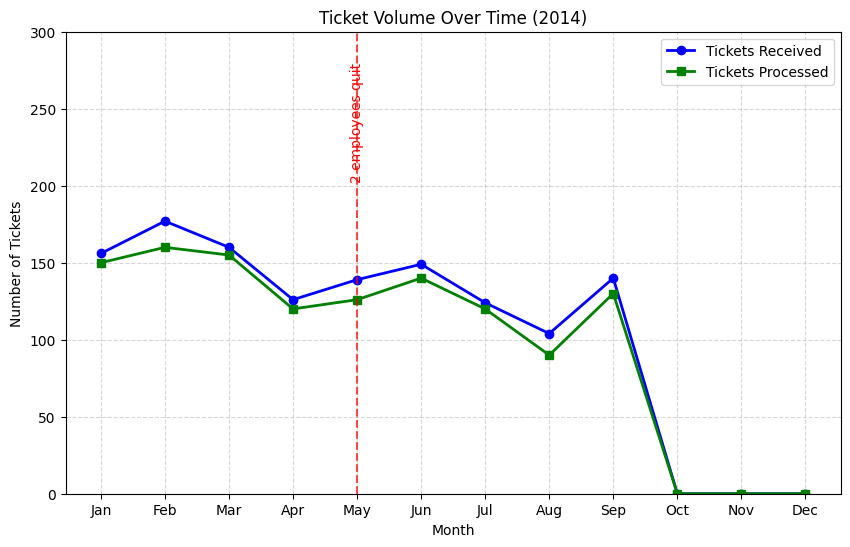

In [25]:
import matplotlib.pyplot as plt


# Months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Ticket volumes
tickets_received = [156, 177, 160, 126, 139, 149, 124, 104, 140, 0, 0, 0]
tickets_processed = [150, 160, 155, 120, 126, 140, 120, 90, 130, 0, 0, 0]

plt.figure(figsize=(10,6))

# Plot both lines
plt.plot(months, tickets_received, marker='o', color='blue', linewidth=2, label='Tickets Received')
plt.plot(months, tickets_processed, marker='s', color='green', linewidth=2, label='Tickets Processed')

# Highlight May when 2 employees quit
plt.axvline(x=4, color='red', linestyle='--', alpha=0.7)
plt.text(4, 280, '2 employees quit', rotation=90, color='red', va='top', ha='center')

# Axis limits
plt.ylim(0, 300)

# Labels and title
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.title('Ticket Volume Over Time (2014)')

# Add legend
plt.legend()

# grid for clarity
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


